In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
data = pd.read_csv("train-val.csv")

#First 5 rows of the dataset
data.head()

,ID,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3423,2016-03-04,Tuggeranong,14.4,32.2,11.0,NaN,NaN,NE,22.0,...,81.0,32.0,1021.6,1018.0,NaN,NaN,18.4,31.2,1,0
1,6095,2013-06-23,GoldCoast,11.0,21.5,0.0,NaN,NaN,S,43.0,...,64.0,58.0,1024.1,1021.2,NaN,NaN,17.1,20.2,0,0
2,403,2009-07-05,Cobar,8.3,14.7,0.0,2.4,7.4,SSW,24.0,...,79.0,55.0,1021.8,1019.7,7.0,6.0,10.6,14.0,0,0
3,333,2014-10-12,BadgerysCreek,8.8,32.2,0.0,NaN,NaN,ENE,37.0,...,65.0,18.0,1017.5,1011.7,NaN,NaN,17.7,30.9,0,0
4,2085,2012-07-04,Sydney,7.2,16.2,0.0,3.6,6.4,NaN,NaN,...,55.0,43.0,1024.6,1025.1,3.0,7.0,9.6,15.9,0,1


Exploratory Data Analysis (EDA)

In [2]:
num_samples, num_features = data.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 7262
Number of features: 24


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             7262 non-null   int64  
 1   Date           7262 non-null   object 
 2   Location       7262 non-null   object 
 3   MinTemp        7237 non-null   float64
 4   MaxTemp        7251 non-null   float64
 5   Rainfall       7262 non-null   float64
 6   Evaporation    4223 non-null   float64
 7   Sunshine       3817 non-null   float64
 8   WindGustDir    6787 non-null   object 
 9   WindGustSpeed  6789 non-null   float64
 10  WindDir9am     6692 non-null   object 
 11  WindDir3pm     7049 non-null   object 
 12  WindSpeed9am   7207 non-null   float64
 13  WindSpeed3pm   7128 non-null   float64
 14  Humidity9am    7185 non-null   float64
 15  Humidity3pm    7094 non-null   float64
 16  Pressure9am    6576 non-null   float64
 17  Pressure3pm    6575 non-null   float64
 18  Cloud9am

In [3]:
feature_labels = data.columns.tolist()
print("Feature labels:")
print(feature_labels)

Feature labels:
['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [4]:
categories_count = data['RainTomorrow'].nunique()
print("Number of categories for 'target' =", (categories_count))

Number of categories for 'target' = 2


In [5]:
samples_count = data['RainTomorrow'].value_counts()
print("Number of samples in each category of", samples_count)

Number of samples in each category of RainTomorrow
0    5623
1    1639
Name: count, dtype: int64


In [6]:
numeric_data = data.select_dtypes(include = ['float64', 'int64'])
correlation_matrix = numeric_data.corr()
correlation_matrix

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
ID,1.000000,0.101510,0.133521,-0.032217,0.071010,0.051325,0.043297,0.069138,0.030900,-0.117635,-0.075666,-0.084635,-0.089954,-0.071564,-0.064091,0.136345,0.125620,-0.008100,-0.000595
MinTemp,0.101510,1.000000,0.709894,0.093915,0.460272,0.064273,0.165904,0.199696,0.192065,-0.227187,0.023297,-0.366575,-0.378641,0.056189,-0.000523,0.888775,0.679368,0.064523,0.076245
MaxTemp,0.133521,0.709894,1.000000,-0.098454,0.571740,0.469705,0.008927,0.009758,0.057063,-0.485498,-0.493780,-0.217367,-0.326057,-0.315717,-0.314760,0.881857,0.983124,-0.240200,-0.175112
Rainfall,-0.032217,0.093915,-0.098454,1.000000,-0.074776,-0.182762,0.182268,0.127017,0.093557,0.204239,0.235734,-0.192867,-0.133201,0.188081,0.165398,-0.009739,-0.100264,0.508495,0.206823
Evaporation,0.071010,0.460272,0.571740,-0.074776,1.000000,0.348179,0.168108,0.207150,0.135517,-0.502250,-0.373950,-0.208560,-0.244390,-0.193750,-0.196783,0.552718,0.558556,-0.178420,-0.111138
Sunshine,0.051325,0.064273,0.469705,-0.182762,0.348179,1.000000,-0.068132,0.020779,0.047236,-0.463217,-0.621705,0.093877,0.025512,-0.690637,-0.715964,0.295746,0.494379,-0.283477,-0.433374
WindGustSpeed,0.043297,0.165904,0.008927,0.182268,0.168108,-0.068132,1.000000,0.630244,0.706897,-0.218186,0.008154,-0.496235,-0.445468,0.087869,0.140471,0.127086,-0.028502,0.201441,0.291813
WindSpeed9am,0.069138,0.199696,0.009758,0.127017,0.207150,0.020779,0.630244,1.000000,0.543124,-0.299031,-0.033898,-0.263245,-0.209356,0.034047,0.061122,0.144137,-0.006178,0.127078,0.109336
WindSpeed3pm,0.030900,0.192065,0.057063,0.093557,0.135517,0.047236,0.706897,0.543124,1.000000,-0.167797,0.002906,-0.335823,-0.297948,0.063603,0.059018,0.176276,0.028872,0.119698,0.137652
Humidity9am,-0.117635,-0.227187,-0.485498,0.204239,-0.502250,-0.463217,-0.218186,-0.299031,-0.167797,1.000000,0.647581,0.124066,0.179100,0.442494,0.366222,-0.475319,-0.475040,0.333259,0.230218


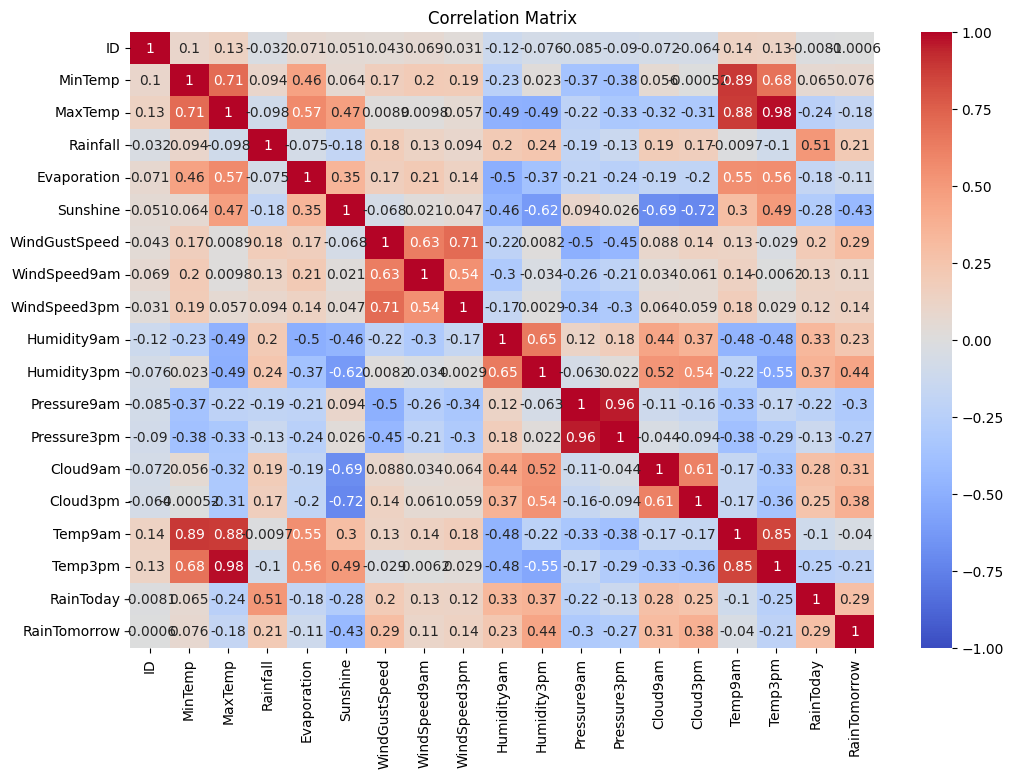

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

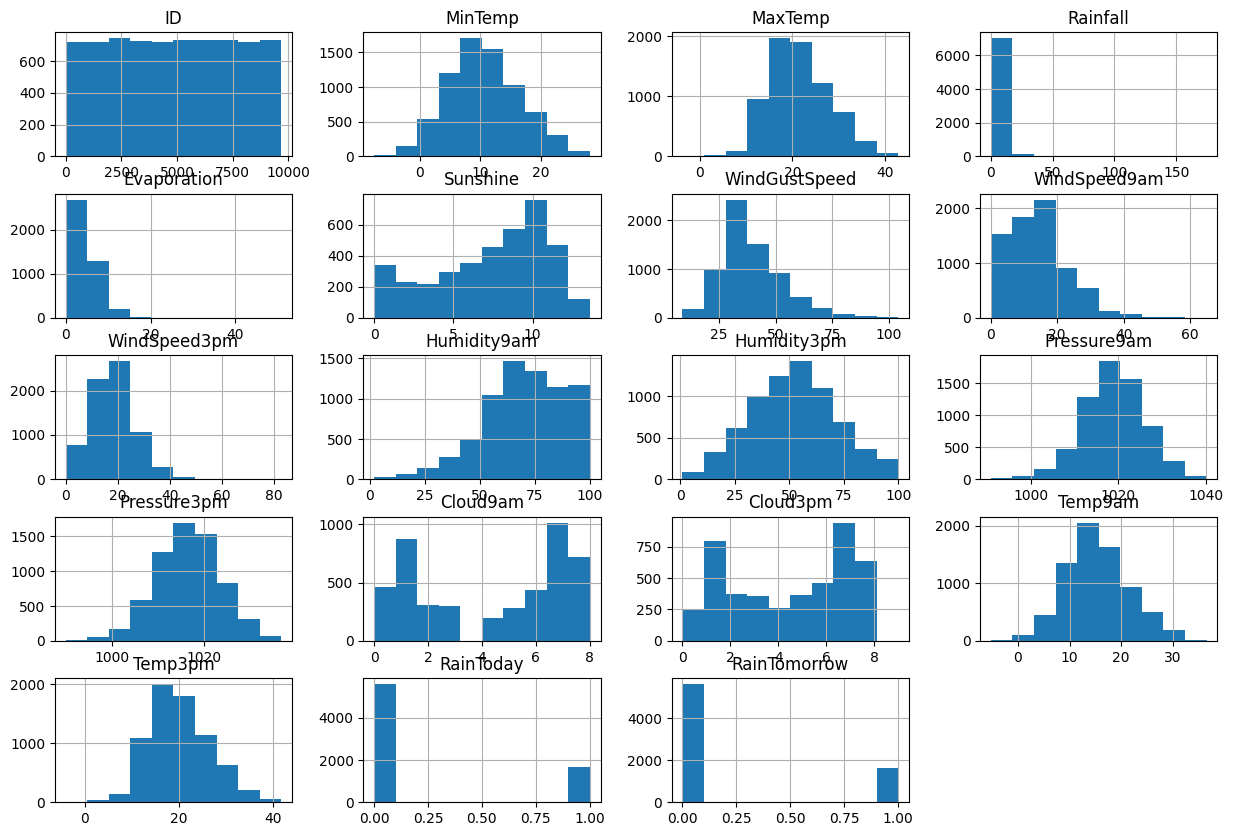

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
data.hist(bins=10, figsize=(15, 10))
plt.show()

### Data preprocessing

In [9]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Month'] = data['Date'].dt.month
data['TempDiff'] = data['MaxTemp'] - data['MinTemp']

data['HumidityDiff'] = data['Humidity3pm'] - data['Humidity9am']
#data['CloudDiff'] = data['Cloud3pm'] - data['Cloud9am']
#data['WindSpeedDiff'] = data['WindSpeed3pm'] - data['WindSpeed9am']

data = data.drop(columns = ['Date','MinTemp', 'MaxTemp', 'Humidity9am',
                       'WindSpeed3pm', 'WindSpeed9am', 'Evaporation', 'Temp9am'])
print(data.columns)

Index(['ID', 'Location', 'Rainfall', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Month', 'TempDiff', 'HumidityDiff'],
      dtype='object')


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             7262 non-null   int64  
 1   Location       7262 non-null   object 
 2   Rainfall       7262 non-null   float64
 3   Sunshine       3817 non-null   float64
 4   WindGustDir    6787 non-null   object 
 5   WindGustSpeed  6789 non-null   float64
 6   WindDir9am     6692 non-null   object 
 7   WindDir3pm     7049 non-null   object 
 8   Humidity3pm    7094 non-null   float64
 9   Pressure9am    6576 non-null   float64
 10  Pressure3pm    6575 non-null   float64
 11  Cloud9am       4592 non-null   float64
 12  Cloud3pm       4443 non-null   float64
 13  Temp3pm        7142 non-null   float64
 14  RainToday      7262 non-null   int64  
 15  RainTomorrow   7262 non-null   int64  
 16  Month          7262 non-null   int32  
 17  TempDiff       7230 non-null   float64
 18  Humidity

In [12]:
missing_values = data.isnull().sum()
print("Missing values per feature:")
print(missing_values[missing_values > 0])

Missing values per feature:
Sunshine         3445
WindGustDir       475
WindGustSpeed     473
WindDir9am        570
WindDir3pm        213
Humidity3pm       168
Pressure9am       686
Pressure3pm       687
Cloud9am         2670
Cloud3pm         2819
Temp3pm           120
TempDiff           32
HumidityDiff      196
dtype: int64


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder

categorical_features = data.select_dtypes(include='object').columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('imputer', KNNImputer(n_neighbors=20, weights="uniform"))])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#
numeric_features = data.select_dtypes(include = ['float64', 'int64']).columns.tolist()
if 'RainTomorrow' in numeric_features:
  numeric_features.remove('RainTomorrow')
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', StandardScaler())])

In [23]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to the dataset
# Transform DataFrame and save to new clean DataFrame for training
data_cleaned = preprocessor.fit_transform(data)

# Convert the result to a DataFrame with correct column names
# Get the names of the new features
feature_names = (numeric_features +
                 list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)))
data_cleaned = pd.DataFrame(data_cleaned, columns=feature_names)

# We add the target column "RainTomorrow" to the clean DataFrame
data_cleaned['RainTomorrow'] = data['RainTomorrow'].values

In [26]:
# X contains all attributes except the label (RainTomorrow)
X = data_cleaned.drop('RainTomorrow', axis=1)

# y is the target column, RainTomorrow
y = data_cleaned['RainTomorrow']

In [27]:
from sklearn.model_selection import train_test_split
# Split into training (70%) and validation (30%) set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

### Training models with default values

1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


In [28]:
# Import the necessary classifiers from scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Definition of classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'MLP': MLPClassifier(max_iter=2000, random_state=42),  # We increase max_iter to ensure convergence
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Training and display of labeled samples
for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    # Training the classifier with the already preprocessed data
    classifier.fit(X_train, y_train)
    # Save the trained classifier
    classifiers[name] = classifier

    # Display the first 5 samples of the training set
    print("Sample Training Data with Labels:")
    for i in range(5):
        print(f"Input: {X_train.iloc[i].values}, Label: {y_train.iloc[i]}")


Training Naive Bayes...
Sample Training Data with Labels:
Input: [-1.00709881 -0.28688469 -2.22762532 -0.39386019  1.28902625  0.20340005
 -0.28481705  1.04707998  1.50275079 -0.37665976 -0.54478043 -0.77178461
  0.79699562  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.    

In [29]:
# Save predictions for each model
predictions = {}

# Prediction for each trained classifier
for name, classifier in classifiers.items():
    # Prediction in the validation set
    y_pred = classifier.predict(X_val)
    predictions[name] = y_pred

In [107]:
from sklearn.metrics import f1_score

# Saving the F1 score results for each classifier
f1_scores = {}

# Calculation of the F1 score
for name, y_pred in predictions.items():
    f1 = f1_score(y_val, y_pred)
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.4f}")

Naive Bayes F1 Score: 0.4798
KNN F1 Score: 0.5386
Logistic Regression F1 Score: 0.5993
MLP F1 Score: 0.5673
SVC F1 Score: 0.5870
Decision Tree F1 Score: 0.5146
Random Forest F1 Score: 0.5774


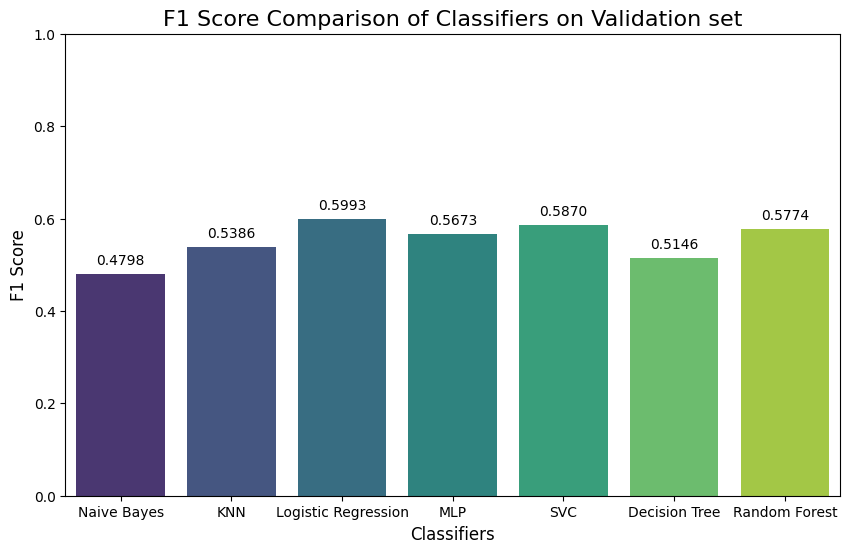

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the results with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), hue=list(f1_scores.keys()), dodge=False, palette='viridis', legend=False)

plt.title('F1 Score Comparison of Classifiers on Validation set', fontsize=16)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)  # The F1 score ranges between 0 and 1

# Show F1 values ​​above the bars
for i, score in enumerate(f1_scores.values()):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center', fontsize=10)

plt.show()

### New Dataset

In [30]:
import pandas as pd

# Load the test set
test_data = pd.read_csv('test.csv')

# Extract the 'ID' column from the test set
test_ids = test_data['ID']

test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')
test_data['Month'] = test_data['Date'].dt.month
test_data['TempDiff'] = test_data['MaxTemp'] - test_data['MinTemp']
#test_data['PressureDiff'] = test_data['Pressure3pm'] - test_data['Pressure9am']
test_data['HumidityDiff'] = test_data['Humidity3pm'] - test_data['Humidity9am']
#test_data['CloudDiff'] = test_data['Cloud3pm'] - test_data['Cloud9am']
#test_data['WindSpeedDiff'] = test_data['WindSpeed3pm'] - test_data['WindSpeed9am']

test_data = test_data.drop(columns = ['Date','MinTemp', 'MaxTemp', 'Humidity9am',
                       'WindSpeed3pm', 'WindSpeed9am', 'Evaporation', 'Temp9am'])
missing_values = test_data.isnull().sum()
print("Missing values per feature:")
print(missing_values[missing_values > 0])

numeric_columns = test_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'RainTomorrow' in numeric_features:
  numeric_columns.remove('RainTomorrow')
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=10, random_state=0)),
    ('scaler', StandardScaler())])


categorical_columns = test_data.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('imputer', KNNImputer(n_neighbors=20, weights="uniform"))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Apply preprocessing to test set features
# We use the preprocessor we defined before
X_test_processed = preprocessor.fit_transform(test_data)

# Convert X_test_processed to DataFrame with correct column names
feature_names = (numeric_features +
                 list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)))
X_test = pd.DataFrame(X_test_processed, columns=feature_names)

# Prediction with the trained Logistic Regression model
best_model = classifiers['Logistic Regression']
y_test_pred = best_model.predict(X_test)

# Display the first 5 predictions in the test set
print("Predictions on Test Set (first 5 samples):")
print(y_test_pred[:5])

Missing values per feature:
Sunshine         1144
WindGustDir       163
WindGustSpeed     161
WindDir9am        184
WindDir3pm         81
Humidity3pm        71
Pressure9am       244
Pressure3pm       242
Cloud9am          929
Cloud3pm          980
Temp3pm            43
TempDiff           16
HumidityDiff       80
dtype: int64
Predictions on Test Set (first 5 samples):
[0 0 0 0 0]


In [31]:
# Create a DataFrame with the predictions and the 'ID' column
output = pd.DataFrame({'ID': test_ids, 'Prediction': y_test_pred})

# Save the file to CSV
output.to_csv('test_predictions15.csv', index=False)

### Model optimization by finding the best hyperparameters of classifiers


In [122]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, classification_report

# Import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assume X_train, y_train, X_val, y_val are already defined and preprocessed

# Define classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'MLP': MLPClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Define parameter grids for each classifier
param_grids = {
    'Naive Bayes': {
        'var_smoothing': np.logspace(0, -9, num=100)
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['lbfgs', 'liblinear']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant', 'adaptive', 'invscaling'],
        'solver' : ['adam', 'sgd']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    }
}

# Dictionary to store the best estimators
best_classifiers = {}

# Use stratified k-fold cross-validation to maintain class balance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over classifiers
for name in classifiers.keys():
    print(f"\nTraining and tuning {name}...")
    classifier = classifiers[name]
    param_grid = param_grids[name]
    grid_search = GridSearchCV(estimator=classifier,
                               param_grid=param_grid,
                               cv=cv,
                               scoring='f1',
                               n_jobs=-1,
                               error_score='raise')  # Set error_score to 'raise' to catch errors
    try:
        grid_search.fit(X_train, y_train)
        best_classifiers[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
        print(f"Best cross-validation F1 score for {name}: {grid_search.best_score_:.4f}")
    except Exception as e:
        print(f"An error occurred during grid search for {name}: {e}")





Training and tuning Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 0.23101297000831597}
Best cross-validation F1 score for Naive Bayes: 0.6126

Training and tuning KNN...
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation F1 score for KNN: 0.5738

Training and tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best cross-validation F1 score for Logistic Regression: 0.6005

Training and tuning MLP...


C:\Users\kyria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation F1 score for MLP: 0.6284

Training and tuning SVC...
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation F1 score for SVC: 0.6137

Training and tuning Decision Tree...
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation F1 score for Decision Tree: 0.5766

Training and tuning Random Forest...
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation F1 score for Random Forest: 0.6008


In [128]:
# Evaluate each classifier on the validation set
from sklearn.metrics import accuracy_score

for name, classifier in best_classifiers.items():
    y_pred = classifier.predict(X_val)
    f1 = f1_score(y_val, y_pred, pos_label=1)  # Adjust pos_label if necessary
    accuracy = accuracy_score(y_val, y_pred)
    print(f"\n{name} Performance on Validation Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(classification_report(y_val, y_pred))


Naive Bayes Performance on Validation Set:
Accuracy: 0.8040
F1 Score: 0.5953
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1694
           1       0.55      0.65      0.60       485

    accuracy                           0.80      2179
   macro avg       0.72      0.75      0.73      2179
weighted avg       0.82      0.80      0.81      2179


KNN Performance on Validation Set:
Accuracy: 0.8270
F1 Score: 0.5386
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1694
           1       0.66      0.45      0.54       485

    accuracy                           0.83      2179
   macro avg       0.76      0.69      0.72      2179
weighted avg       0.81      0.83      0.81      2179


Logistic Regression Performance on Validation Set:
Accuracy: 0.8417
F1 Score: 0.6002
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1694
   

In [129]:
# Dictionary to store the predictions in the validation set for each optimal model
validation_predictions = {}

# Apply predict to the validation set for each classifier
for name, best_model in best_classifiers.items():
    print(f"\nPredicting on validation set with {name}...")

    # Prediction in validation set (X_val)
    y_val_pred = best_model.predict(X_val)

    # Saving the predictions in the dictionary
    validation_predictions[name] = y_val_pred

    # Show the first 5 predictions for confirmation
    print(f"First 5 predictions for {name}: {y_val_pred[:5]}")


Predicting on validation set with Naive Bayes...
First 5 predictions for Naive Bayes: [0 0 0 1 0]

Predicting on validation set with KNN...
First 5 predictions for KNN: [0 0 0 0 0]

Predicting on validation set with Logistic Regression...
First 5 predictions for Logistic Regression: [0 0 0 1 0]

Predicting on validation set with MLP...
First 5 predictions for MLP: [0 0 0 1 0]

Predicting on validation set with SVC...
First 5 predictions for SVC: [0 0 0 1 0]

Predicting on validation set with Decision Tree...
First 5 predictions for Decision Tree: [0 0 0 1 0]

Predicting on validation set with Random Forest...
First 5 predictions for Random Forest: [0 0 0 1 0]


In [130]:
from sklearn.metrics import f1_score

# Evaluate the performance of each optimal model in the validation set
f1_scores = {}

for name, y_val_pred in validation_predictions.items():
    # Calculation of F1 score
    f1 = f1_score(y_val, y_val_pred)

    # Save the F1 score for each model
    f1_scores[name] = f1

    # Display the F1 score for each model
    print(f"{name} F1 Score: {f1:.4f}")

# Find the model with the highest F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest model based on F1 Score: {best_model_name} with F1 Score: {f1_scores[best_model_name]:.4f}")


Naive Bayes F1 Score: 0.5953
KNN F1 Score: 0.5386
Logistic Regression F1 Score: 0.6002
MLP F1 Score: 0.6095
SVC F1 Score: 0.5817
Decision Tree F1 Score: 0.5457
Random Forest F1 Score: 0.5954

Best model based on F1 Score: MLP with F1 Score: 0.6095


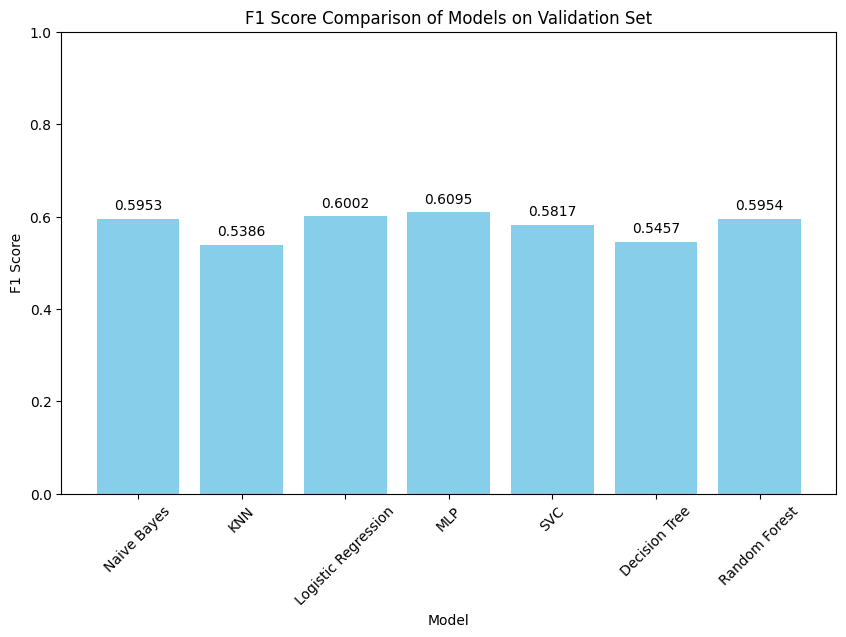

In [131]:
import matplotlib.pyplot as plt

# Creation of the bar plot with the F1 scores of the models
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Models on Validation Set')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # The F1 score ranges between 0 and 1

# Show F1 scores above the bars
for index, (model, f1) in enumerate(f1_scores.items()):
    plt.text(index, f1 + 0.02, f"{f1:.4f}", ha='center')

plt.show()

In [132]:
# Retrieve the model with the best performance
# Where best_model_name is the name of the best model from step 6c
best_model = best_classifiers[best_model_name]

# Prediction on the test set using the best model
y_test_pred_best = best_model.predict(X_test)

# Display the first 5 predictions for confirmation
print("Predictions on Test Set (first 5 samples):")
print(y_test_pred_best[:5])

Predictions on Test Set (first 5 samples):
[0 0 0 0 0]


In [133]:
# Retrieve the 'ID' column from the test set
test_ids = test_data['ID']

# Create a DataFrame with the predictions and the 'ID' column
output = pd.DataFrame({'ID': test_ids, 'Prediction': y_test_pred_best})

# Save the DataFrame to a CSV file
output.to_csv('final_test_predictions2.csv', index=False)

print("Predictions have been saved to 'final_test_predictions.csv'.")

Predictions have been saved to 'final_test_predictions.csv'.
